In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
df= pd.read_csv('adults.csv')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,martial.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   martial.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:

# Education field has a categorized column by name education.num- Dropping Education
#fnlwgt- Final weights taken to realate demographic characteristics among examples- People with similar demographic characteristics should have similar weights- Irrelavant in the current setting
df = df.drop(['education', 'fnlwgt'], axis = 1) 

In [ ]:
#Replacing ? with NaN
df.replace('?', np.NaN,inplace = True)

In [ ]:
#filling NaN fields with forward fill(takes the value of next example for replacing NaN field) - to update this with more manual setting (using similarity among examples above and below for all features.)
df.fillna(method = 'ffill', inplace = True)

In [ ]:
# Encoding all the features with Categorised values 
xLabelEncoder = LabelEncoder()
df['workclass'] = xLabelEncoder.fit_transform(df['workclass'])
df['martial.status'] = xLabelEncoder.fit_transform(df['martial.status'])
df['occupation'] = xLabelEncoder.fit_transform(df['occupation'])
df['relationship'] = xLabelEncoder.fit_transform(df['relationship'])
df['race'] = xLabelEncoder.fit_transform(df['race'])
df['sex'] = xLabelEncoder.fit_transform(df['sex'])
df['native.country'] = xLabelEncoder.fit_transform(df['native.country'])
df['income'] = xLabelEncoder.fit_transform(df['income'])

df.head()

,age,workclass,education.num,martial.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,7,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,13,2,4,0,4,1,0,0,13,39,0
2,38,4,9,0,6,1,4,1,0,0,40,39,0
3,53,4,7,2,6,0,2,1,0,0,40,39,0
4,28,4,13,2,10,5,2,0,0,0,40,5,0


In [ ]:
#considering martial.status to be  Irrelavant for income classification - Not logically determined decision.
df = df.drop(['martial.status'],axis=1)

In [ ]:
# Splitting target and features into test/train set with 80% data for training
x = df.drop(['income'], axis = 1)
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2) 

In [ ]:
#global variable 
Accu_array=[]

In [ ]:
gb = GaussianNB()
mn = MultinomialNB()
bern= BernoulliNB()

In [ ]:
gb.fit(x_train,y_train)
mn.fit(x_train,y_train)
bern.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
# GaussianNB model - tuning can be added which can overfit data easily
y_pred = gb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)
Accu_array.append(accuracy_score(y_test,y_pred)*100)

[[4731  226]
 [1105  451]]
79.56394902502687


In [ ]:
# MultinomialNB
y_pred = mn.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)
Accu_array.append(accuracy_score(y_test,y_pred)*100)

[[4751  206]
 [1227  329]]
77.99785045294027


In [ ]:
# BernoulliNB
y_pred = bern.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)
Accu_array.append(accuracy_score(y_test,y_pred)*100)

[[4849  108]
 [1215  341]]
79.68678028558269


In [ ]:
#Balanced DT
clf = DecisionTreeClassifier(class_weight='balanced')
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)
Accu_array.append(accuracy_score(y_test,y_pred)*100)

[[4276  681]
 [ 553 1003]]
81.05327805926609


In [ ]:
#LR with Liblinear solver as dataset is considerably small
clf = LogisticRegression(random_state=0,solver='liblinear').fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)
Accu_array.append(accuracy_score(y_test,y_pred)*100)

[[4716  241]
 [ 889  667]]
82.65008444649163


83.80162751420237

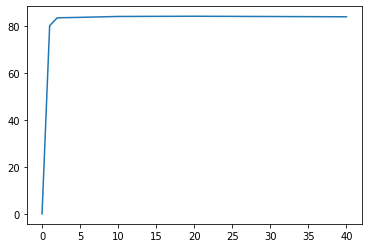

In [ ]:
#Knn for various values K (K with 20 gives highest accuracy)
Knn_accuracy=[0]
xlbl=[0]
for n in [1,2,5,10,20,40]:
  neigh = KNeighborsClassifier(n_neighbors=n)
  neigh.fit(x_train, y_train)
  y_pred = neigh.predict(x_test)
  Knn_accuracy.append(accuracy_score(y_test,y_pred)*100)
  xlbl.append(n)
plt.plot(xlbl,Knn_accuracy)
Accu_array.append(max(Knn_accuracy))
accuracy_score(y_test,y_pred)*100

In [ ]:
#Final accuracy list
Accu_array

[79.56394902502687,
 77.99785045294027,
 79.68678028558269,
 81.05327805926609,
 82.65008444649163,
 84.03193612774452]

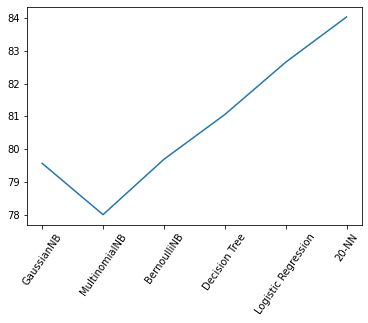

In [ ]:
# plotting accuracies of all classifiers
x=['GaussianNB','MultinomialNB','BernoulliNB','Decision Tree','Logistic Regression',str(xlbl[Knn_accuracy.index(max(Knn_accuracy))])+'-NN']
fig, splot = plt.subplots()
splot.plot(x,Accu_array)
for tick in splot.get_xticklabels():
    tick.set_rotation(55)
fig.align_xlabels()

In [ ]:
#Update using the demographic factor and logical approach to Fillna method.